In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# Looking at the Data

In [3]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
test_df.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

# Basic Statistics

In [9]:
def missing_data(data):
    total = data.isnull().sum()
    percent = round(data.isnull().sum()/data.isnull().count()*100,2)
    tt = pd.concat((total, percent), axis=1, keys=['Total', 'Percent'])
    dtypes = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        dtypes.append(dtype)
    tt['Types'] = dtypes
    return np.transpose(tt)

In [10]:
missing_data(train_df)

PassengerId Survived Pclass    Name     Sex      Age  SibSp  Parch  \
Total             0        0      0       0       0      177      0      0   
Percent         0.0      0.0    0.0     0.0     0.0    19.87    0.0    0.0   
Types         int64    int64  int64  object  object  float64  int64  int64   

         Ticket     Fare   Cabin Embarked  
Total         0        0     687        2  
Percent     0.0      0.0    77.1     0.22  
Types    object  float64  object   object

In [11]:
missing_data(test_df)

PassengerId Pclass    Name     Sex      Age  SibSp  Parch  Ticket  \
Total             0      0       0       0       86      0      0       0   
Percent         0.0    0.0     0.0     0.0    20.57    0.0    0.0     0.0   
Types         int64  int64  object  object  float64  int64  int64  object   

            Fare   Cabin Embarked  
Total          1     327        0  
Percent     0.24   78.23      0.0  
Types    float64  object   object

In [12]:
def most_frequent_values(data):
    count = data.count()
    tt = pd.DataFrame(count)
    tt.columns = ['Total']
    itms = []
    vals = []
    for col in data.columns:
        vc = data[col].value_counts()
        try:
            itms.append(vc.index[0])
            vals.append(vc.values[0])
        except Exception as ex:
            print(ex)
            itms.append(None)
            vals.append(None)
    tt['Most Frequent Item'] = itms
    tt['Frequency'] = vals
    tt['Frequency to Count %'] = round(vals/count*100,2)
    return np.transpose(tt)
        

In [13]:
most_frequent_values(train_df)

PassengerId Survived Pclass                     Name  \
Total                        891      891    891                      891   
Most Frequent Item             1        0      3  Braund, Mr. Owen Harris   
Frequency                      1      549    491                        1   
Frequency to Count %        0.11    61.62  55.11                     0.11   

                        Sex   Age  SibSp  Parch  Ticket  Fare    Cabin  \
Total                   891   714    891    891     891   891      204   
Most Frequent Item     male  24.0      0      0  347082  8.05  B96 B98   
Frequency               577    30    608    678       7    43        4   
Frequency to Count %  64.76   4.2  68.24  76.09    0.79  4.83     1.96   

                     Embarked  
Total                     889  
Most Frequent Item          S  
Frequency                 644  
Frequency to Count %    72.44

In [14]:
most_frequent_values(test_df)

PassengerId Pclass              Name    Sex   Age SibSp  \
Total                        418    418               418    418   332   418   
Most Frequent Item           892      3  Kelly, Mr. James   male  21.0     0   
Frequency                      1    218                 1    266    17   283   
Frequency to Count %        0.24  52.15              0.24  63.64  5.12  67.7   

                      Parch    Ticket  Fare            Cabin Embarked  
Total                   418       418   417               91      418  
Most Frequent Item        0  PC 17608  7.75  B57 B59 B63 B66        S  
Frequency               324         5    21                3      270  
Frequency to Count %  77.51       1.2  5.04              3.3    64.59

In [15]:
def unique_values(data):
    counts = data.count()
    tt = pd.DataFrame(counts)
    tt.columns = ['Total']
    uniq = []
    for col in data.columns:
        uniq.append(data[col].nunique())
    tt['Uniques'] = uniq
    return np.transpose(tt)

In [16]:
unique_values(train_df)

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Total            891       891     891   891  891  714    891    891     891   
Uniques          891         2       3   891    2   88      7      7     681   

         Fare  Cabin  Embarked  
Total     891    204       889  
Uniques   248    147         3

In [17]:
unique_values(test_df)

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Total            418     418   418  418  332    418    418     418   417   
Uniques          418       3   418    2   79      7      8     363   169   

         Cabin  Embarked  
Total       91       418  
Uniques     76         3

Why did we use all these stats?
* To understand underlying distribution among test and train datasets
* Are there any significant differences between test and train
* What kind of values we have in each columns
* How many values are missing, is this same among both the test and train dataset
* For categorical features, unique values tells us number of categories. Ideally this should be same for test and train dataset. But here we have 8 Parch values in test, 7 Parch values in train

# Exploratory Data Analysis

## Univariate Analysis

In [18]:
all_df = pd.concat((train_df, test_df), axis=0)
all_df['set'] = 'train'
all_df.loc[all_df['Survived'].isna(), 'set'] = 'test'

all_df.sample(5)

PassengerId  Survived  Pclass  \
58            59       1.0       2   
659          660       0.0       1   
182         1074       NaN       1   
302          303       0.0       3   
345          346       1.0       2   

                                                  Name     Sex   Age  SibSp  \
58                        West, Miss. Constance Mirium  female   5.0      1   
659                         Newell, Mr. Arthur Webster    male  58.0      0   
182  Marvin, Mrs. Daniel Warner (Mary Graham Carmic...  female  18.0      1   
302                    Johnson, Mr. William Cahoone Jr    male  19.0      0   
345                      Brown, Miss. Amelia "Mildred"  female  24.0      0   

     Parch      Ticket     Fare Cabin Embarked    set  
58       2  C.A. 34651   27.750   NaN        S  train  
659      2       35273  113.275   D48        C  train  
182      0      113773   53.100   D30        S   test  
302      0        LINE    0.000   NaN        S  train  
345      0      248733   13.000   F33        S  train

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

Custom Color Scheme:


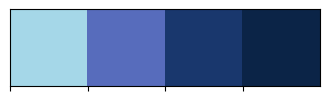

In [20]:
def set_color_map(color_list):
    cmap_custom = ListedColormap(color_list)
    print("Custom Color Scheme:")
    sns.palplot(sns.color_palette(color_list))
    plt.show()
    return cmap_custom


color_list = ['#A5D7E8', '#576CBC', '#19376D', '#0b2447']
cmap_custom = set_color_map(color_list)

In [21]:
def plot_count_pairs(data_df, feature, title, hue='set'):
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.countplot(data=data_df, x=feature, hue=hue, palette=color_list)
    plt.grid(color='black', linestyle='-.', linewidth=0.5, axis='y', which='major')
    ax.set_title(f'Number of passengers / {title}')
    plt.show()

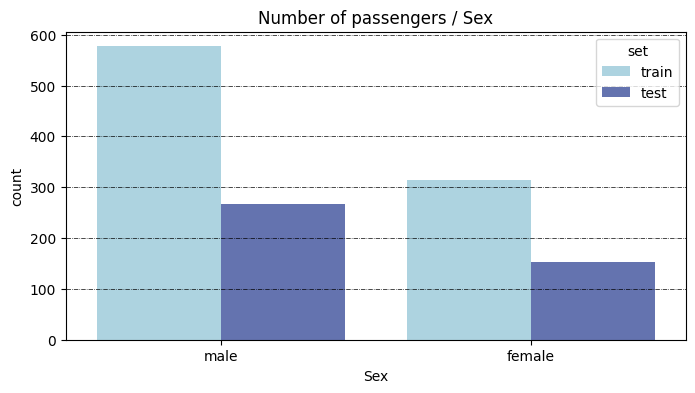

In [22]:
plot_count_pairs(all_df, feature='Sex', title='Sex')

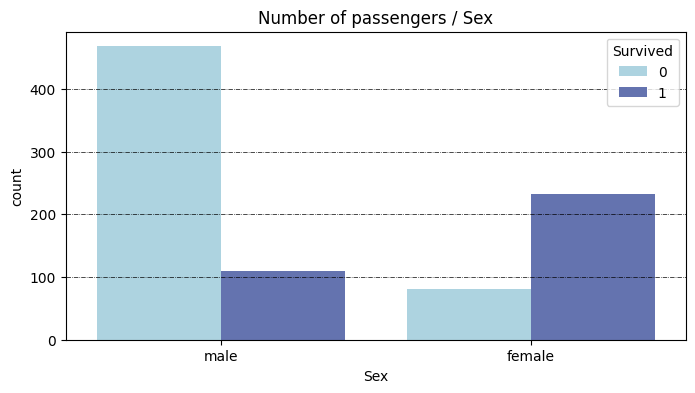

In [23]:
plot_count_pairs(train_df, feature='Sex', title='Sex', hue='Survived')

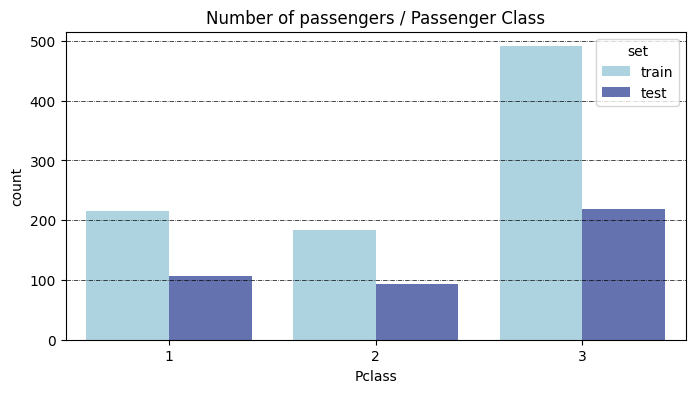

In [24]:
plot_count_pairs(all_df, feature='Pclass', title='Passenger Class')

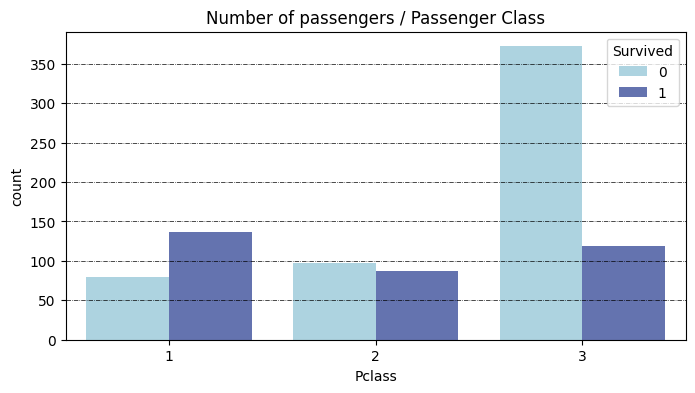

In [25]:
plot_count_pairs(train_df, feature='Pclass', title='Passenger Class', hue='Survived')

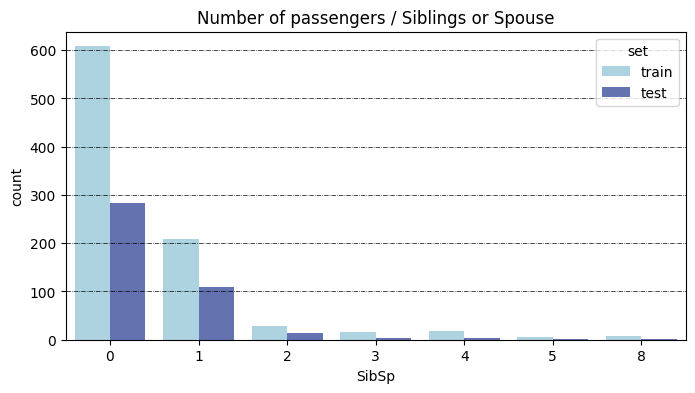

In [26]:
plot_count_pairs(all_df, feature='SibSp', title='Siblings or Spouse')

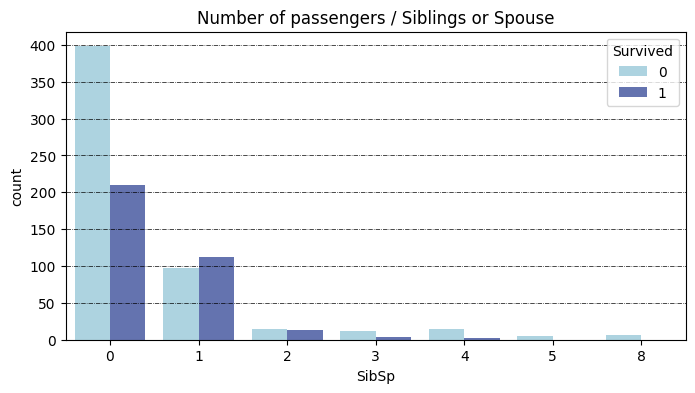

In [27]:
plot_count_pairs(train_df, feature='SibSp', title='Siblings or Spouse', hue='Survived')

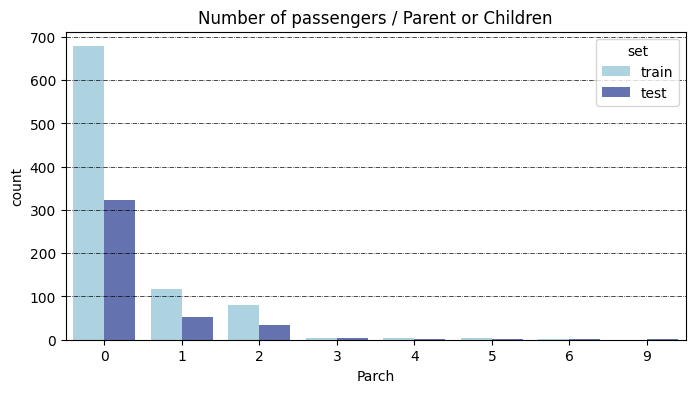

In [28]:
plot_count_pairs(all_df, feature='Parch', title='Parent or Children')

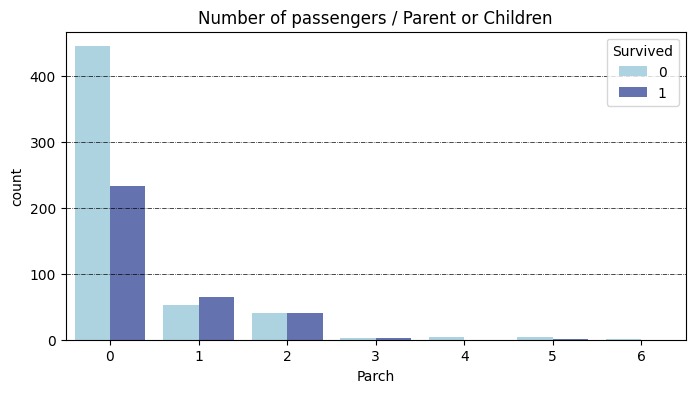

In [29]:
plot_count_pairs(train_df, feature='Parch', title='Parent or Children', hue='Survived')

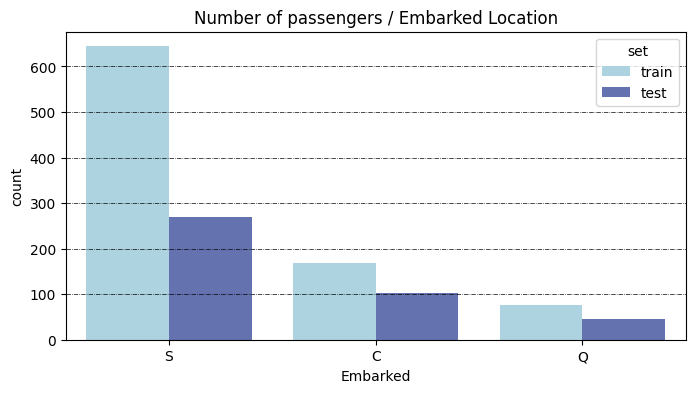

In [30]:
plot_count_pairs(all_df, feature='Embarked', title='Embarked Location')

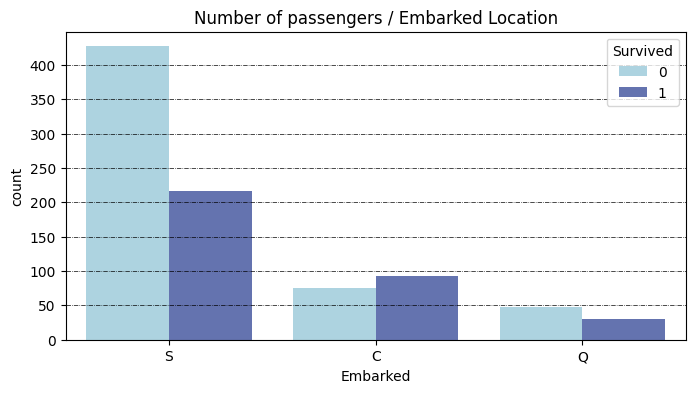

In [31]:
plot_count_pairs(train_df, feature='Embarked', title='Embarked Location', hue='Survived')

In [32]:
def plot_distribution_pairs(data_df, feature, title, hue='set'):
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    for i, h in enumerate(data_df[hue].unique()):
        g = sns.histplot(data_df.loc[data_df[hue]==h, feature], color=color_list[i], ax=ax, label=h)
    plt.grid(color='black', linestyle='-.', linewidth=0.5, axis='y', which='major')
    ax.set_title(f'Number of passengers / {title}')
    g.legend()
    plt.show()

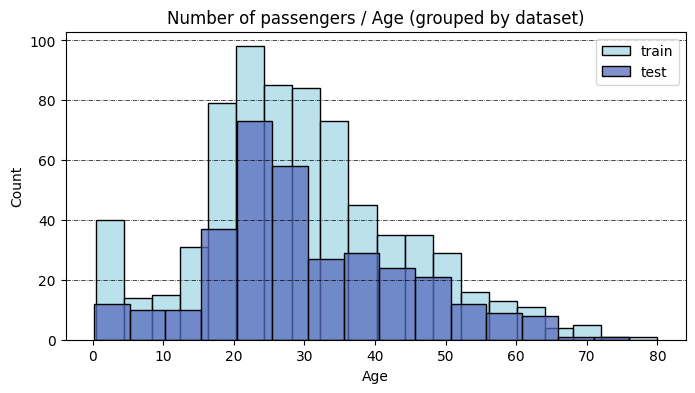

In [33]:
plot_distribution_pairs(all_df, feature='Age', title='Age (grouped by dataset)')

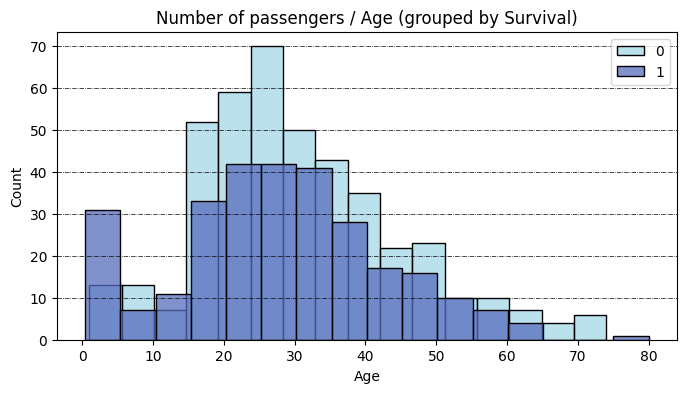

In [34]:
plot_distribution_pairs(train_df, feature='Age', hue='Survived', title='Age (grouped by Survival)')

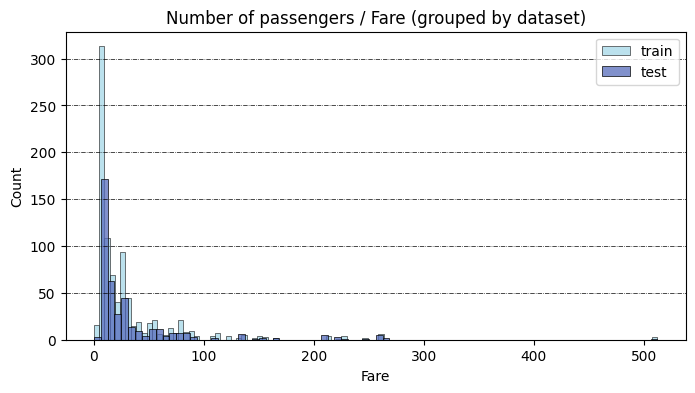

In [35]:
plot_distribution_pairs(all_df, feature='Fare', title='Fare (grouped by dataset)')

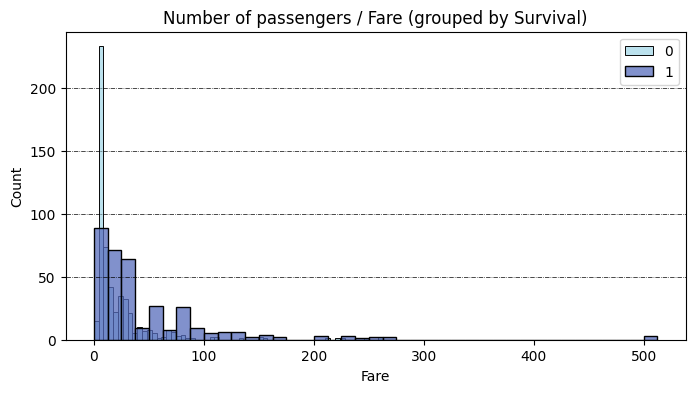

In [36]:
plot_distribution_pairs(train_df, feature='Fare', hue='Survived', title='Fare (grouped by Survival)')

## Engineered Features

### Family Size

In [37]:
train_df['Family Size'] = train_df['Parch']+train_df['SibSp']+1
test_df['Family Size'] = test_df['Parch']+test_df['SibSp']+1
all_df['Family Size'] = all_df['Parch']+all_df['SibSp']+1

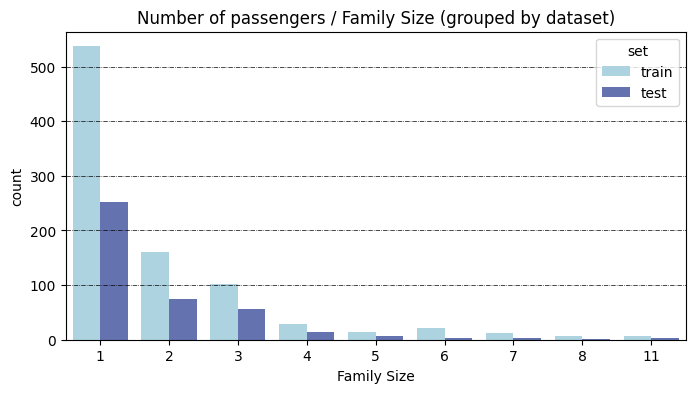

In [38]:
plot_count_pairs(all_df, feature='Family Size', title='Family Size (grouped by dataset)')

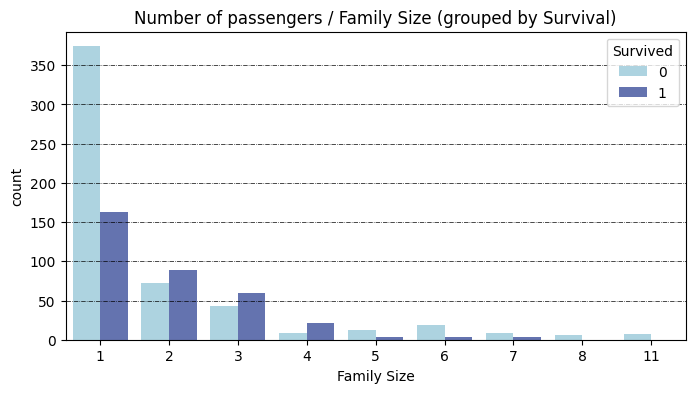

In [39]:
plot_count_pairs(train_df, feature='Family Size', hue='Survived', title='Family Size (grouped by Survival)')

### Age Interval

In [40]:
all_df["Age Interval"] = 0.0
all_df.loc[ all_df['Age'] <= 16, 'Age Interval']  = 0
all_df.loc[(all_df['Age'] > 16) & (all_df['Age'] <= 32), 'Age Interval'] = 1
all_df.loc[(all_df['Age'] > 32) & (all_df['Age'] <= 48), 'Age Interval'] = 2
all_df.loc[(all_df['Age'] > 48) & (all_df['Age'] <= 64), 'Age Interval'] = 3
all_df.loc[ all_df['Age'] > 64, 'Age Interval'] = 4

In [41]:
train_df["Age Interval"] = 0.0
train_df.loc[train_df['Age'] <= 16, 'Age Interval']  = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age Interval'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age Interval'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age Interval'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age Interval'] = 4

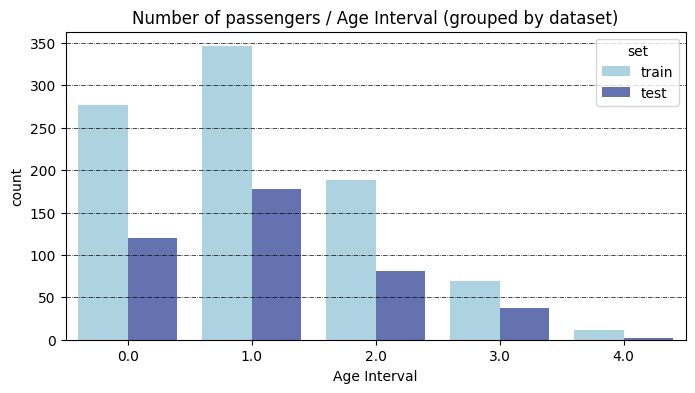

In [42]:
plot_count_pairs(all_df, feature='Age Interval', title='Age Interval (grouped by dataset)')

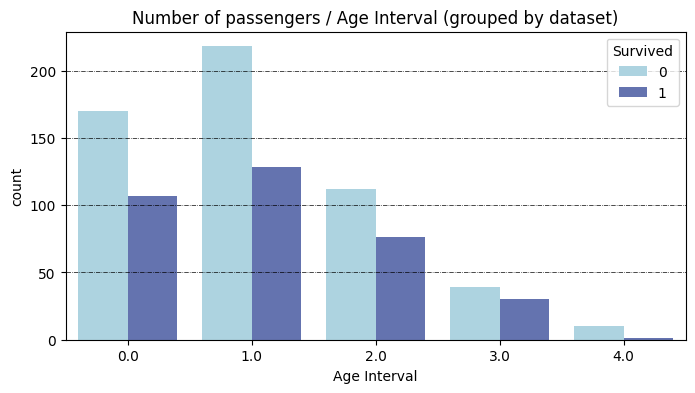

In [43]:
plot_count_pairs(train_df, feature='Age Interval', title='Age Interval (grouped by dataset)', hue='Survived')

In [44]:
all_df['Fare Interval'] = 0.0
all_df.loc[ all_df['Fare'] <= 7.91, 'Fare Interval'] = 0
all_df.loc[(all_df['Fare'] > 7.91) & (all_df['Fare'] <= 14.454), 'Fare Interval'] = 1
all_df.loc[(all_df['Fare'] > 14.454) & (all_df['Fare'] <= 31), 'Fare Interval']   = 2
all_df.loc[ all_df['Fare'] > 31, 'Fare Interval'] = 3

In [45]:
train_df['Fare Interval'] = 0.0
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare Interval'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare Interval'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare Interval']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare Interval'] = 3

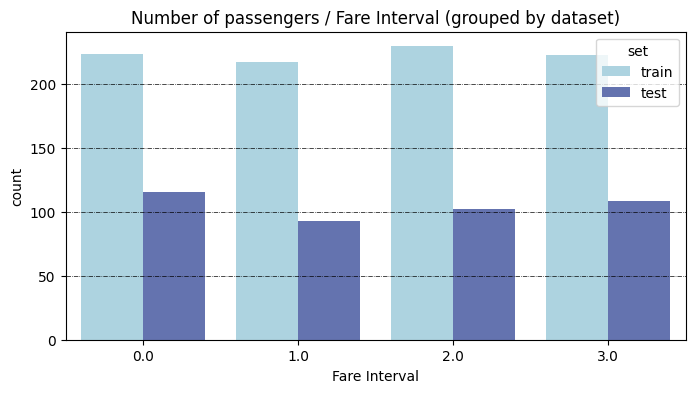

In [46]:
plot_count_pairs(all_df, feature='Fare Interval', title='Fare Interval (grouped by dataset)')

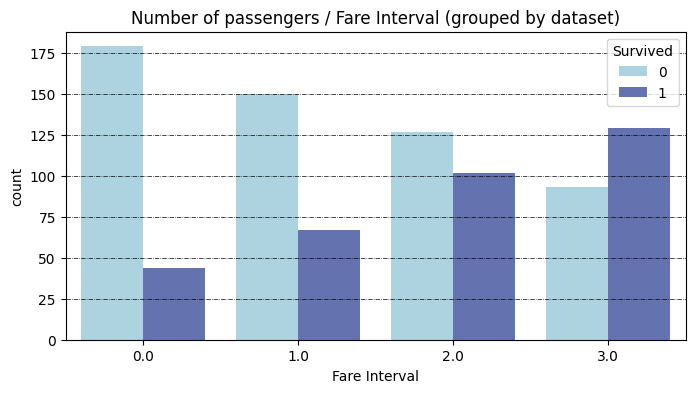

In [47]:
plot_count_pairs(train_df, feature='Fare Interval', title='Fare Interval (grouped by dataset)', hue='Survived')

In [48]:
def get_deck(text):
    try:
        return text[0]
    except Exception as ex:
        return "Unknown"

In [49]:
all_df["Deck"] = all_df["Cabin"].apply(get_deck)
train_df["Deck"] = train_df["Cabin"].apply(get_deck)

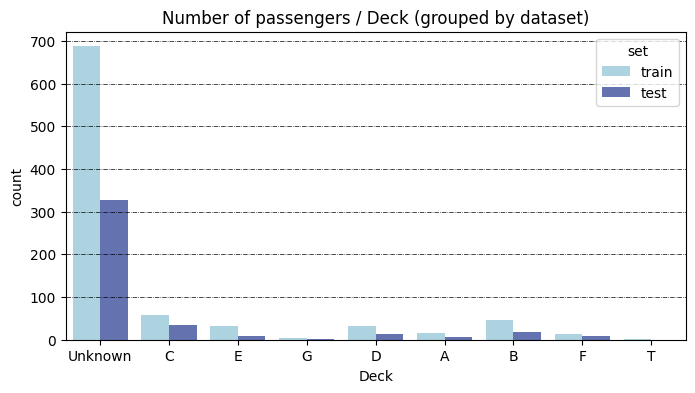

In [50]:
plot_count_pairs(all_df, feature='Deck', title='Deck (grouped by dataset)')

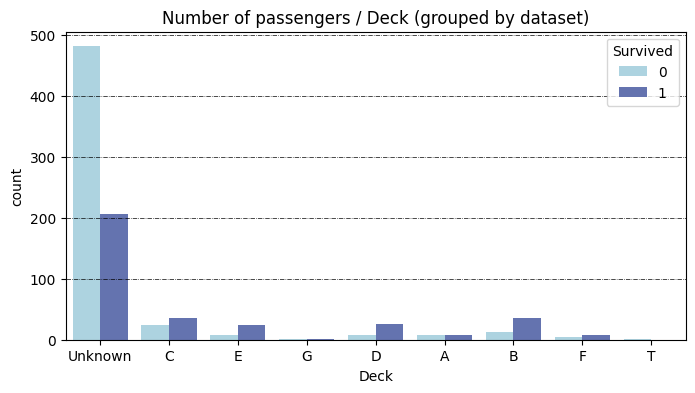

In [51]:
plot_count_pairs(train_df, feature='Deck', title='Deck (grouped by dataset)', hue='Survived')

## Multivariate Analysis

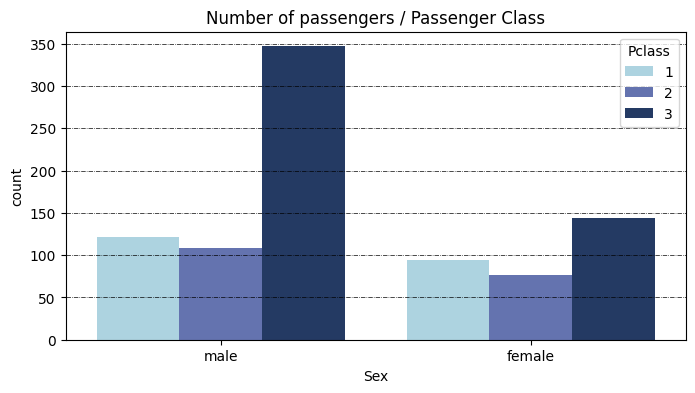

In [52]:
plot_count_pairs(train_df, feature='Sex', hue='Pclass', title='Passenger Class')

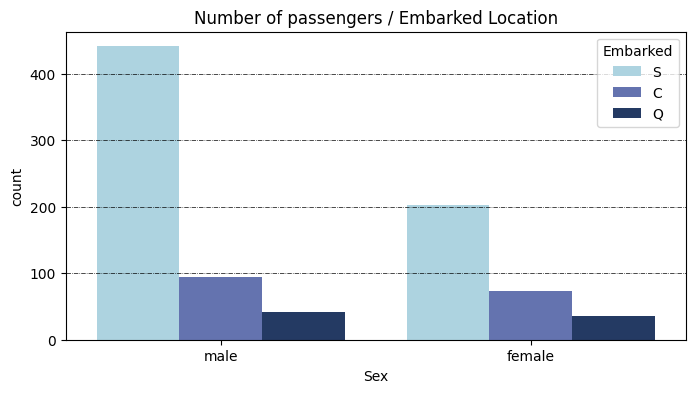

In [53]:
plot_count_pairs(train_df, feature='Sex', hue='Embarked', title='Embarked Location')

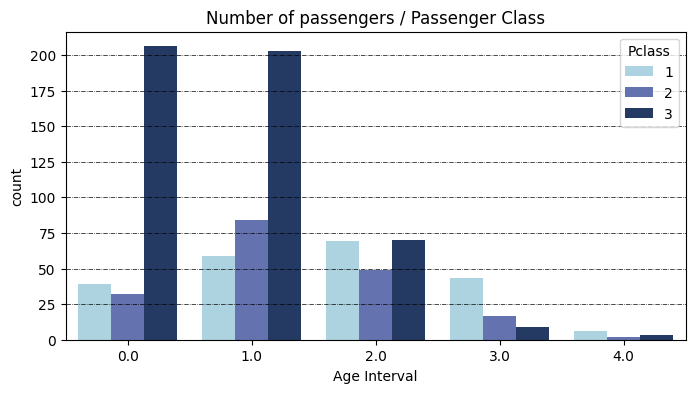

In [54]:
plot_count_pairs(train_df, feature='Age Interval', hue='Pclass', title='Passenger Class')

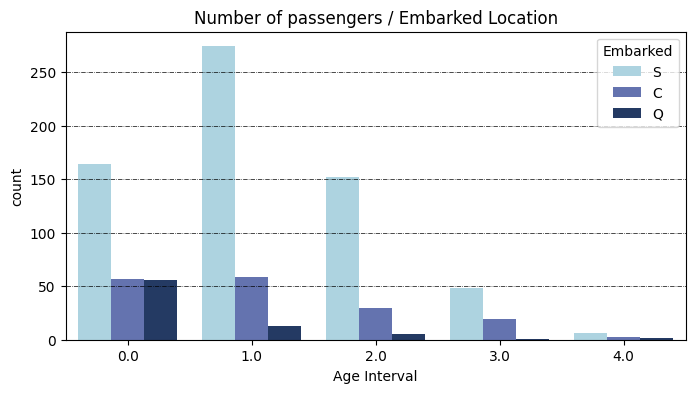

In [55]:
plot_count_pairs(train_df, feature='Age Interval', hue='Embarked', title='Embarked Location')

## Engineered Features

In [56]:
train_df["Sex_Pclass"] = train_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)
all_df["Sex_Pclass"] = all_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)

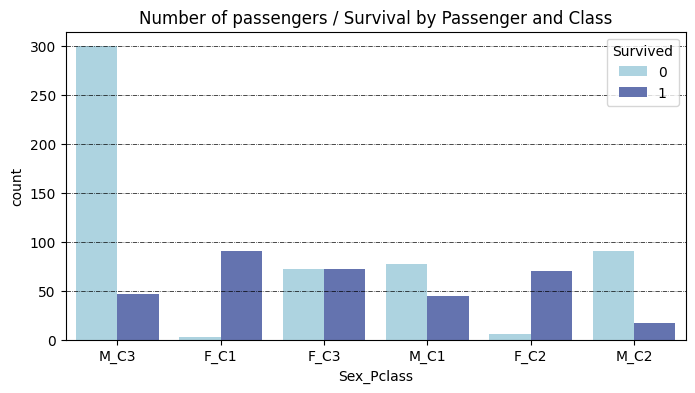

In [57]:
plot_count_pairs(train_df, feature='Sex_Pclass', hue='Survived', title='Survival by Passenger and Class')

In [58]:
all_df.sample()

PassengerId  Survived  Pclass                                 Name  \
184          185       1.0       3  Kink-Heilmann, Miss. Luise Gretchen   

        Sex  Age  SibSp  Parch  Ticket    Fare Cabin Embarked    set  \
184  female  4.0      0      2  315153  22.025   NaN        S  train   

     Family Size  Age Interval  Fare Interval     Deck Sex_Pclass  
184            3           0.0            2.0  Unknown       F_C3

In [59]:
def plot_count_distrib_pairs(data_df, f_one, f_two, title, hue="Survived"):
    sns.set_style("whitegrid", {'axes.grid' : True})
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    sns.kdeplot(x=data_df[f_one], y=data_df[f_two], hue=data_df[hue], palette=color_list)
    ax.set_zlabel('Density')
    ax.set_title(title)
    plt.show()

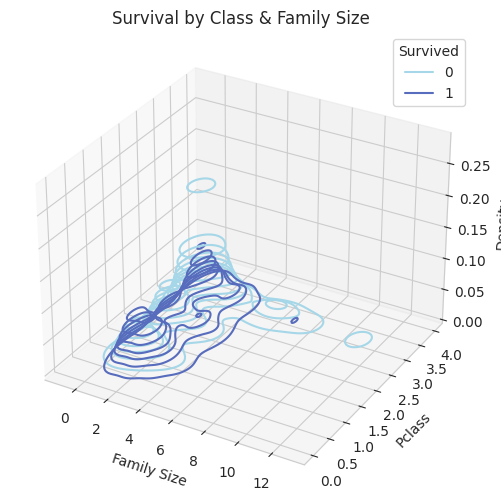

In [60]:
plot_count_distrib_pairs(train_df, 'Family Size', 'Pclass', 'Survival by Class & Family Size')

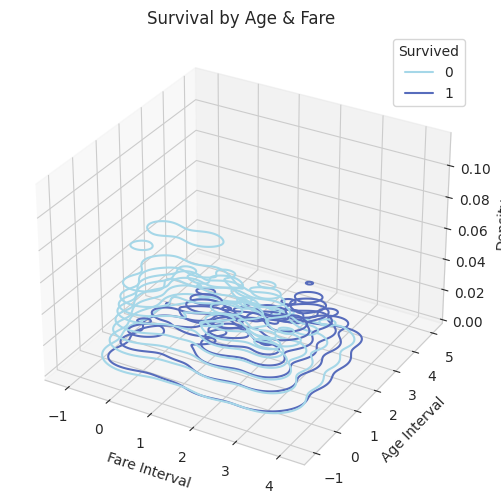

In [61]:
plot_count_distrib_pairs(train_df, 'Fare Interval', 'Age Interval', 'Survival by Age & Fare')

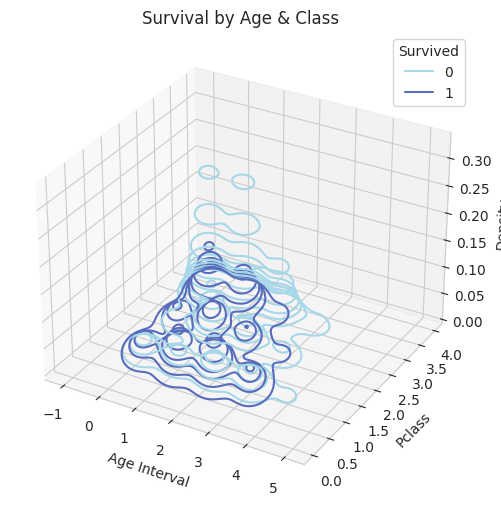

In [62]:
plot_count_distrib_pairs(train_df, 'Age Interval', 'Pclass', 'Survival by Age & Class')

In [63]:
all_df.sample(5)

PassengerId  Survived  Pclass                                    Name  \
26           918       NaN       1            Ostby, Miss. Helene Ragnhild   
654          655       0.0       3            Hegarty, Miss. Hanora "Nora"   
352         1244       NaN       2                     Dibden, Mr. William   
676          677       0.0       3           Sawyer, Mr. Frederick Charles   
214         1106       NaN       3  Andersson, Miss. Ida Augusta Margareta   

        Sex   Age  SibSp  Parch        Ticket     Fare Cabin Embarked    set  \
26   female  22.0      0      1        113509  61.9792   B36        C   test   
654  female  18.0      0      0        365226   6.7500   NaN        Q  train   
352    male  18.0      0      0  S.O.C. 14879  73.5000   NaN        S   test   
676    male  24.5      0      0        342826   8.0500   NaN        S  train   
214  female  38.0      4      2        347091   7.7750   NaN        S   test   

     Family Size  Age Interval  Fare Interval     Deck Sex_Pclass  
26             2           1.0            3.0        B       F_C1  
654            1           1.0            0.0  Unknown       F_C3  
352            1           1.0            3.0  Unknown       M_C2  
676            1           1.0            1.0  Unknown       M_C3  
214            7           2.0            0.0  Unknown       F_C3

## Names & Titles

In [64]:
def parse_names(row):
    try:
        text = row["Name"]
        split_text = text.split(",")
        family_name = split_text[0]
        next_text = split_text[1]
        split_text = next_text.split(".")
        title = (split_text[0] + ".").lstrip().rstrip()
        next_text = split_text[1]
        if "(" in next_text:
            split_text = next_text.split("(")
            given_name = split_text[0]
            maiden_name = split_text[1].rstrip(")")
            return pd.Series([family_name, title, given_name, maiden_name])
        else:
            given_name = next_text
            return pd.Series([family_name, title, given_name, None])
    except Exception as ex:
        print(f"Exception: {ex}")

In [65]:
all_df[["Family Name", "Title", "Given Name", "Maiden Name"]] = all_df.apply(lambda row: parse_names(row), axis=1)
train_df[["Family Name", "Title", "Given Name", "Maiden Name"]] = train_df.apply(lambda row: parse_names(row), axis=1)

In [66]:
np.transpose(pd.crosstab(all_df['Title'], all_df['Sex']))

Title   Capt.  Col.  Don.  Dona.  Dr.  Jonkheer.  Lady.  Major.  Master.  \
Sex                                                                        
female      0     0     0      1    1          0      1       0        0   
male        1     4     1      0    7          1      0       2       61   

Title   Miss.  Mlle.  Mme.  Mr.  Mrs.  Ms.  Rev.  Sir.  the Countess.  
Sex                                                                    
female    260      2     1    0   197    2     0     0              1  
male        0      0     0  757     0    0     8     1              0

In [67]:
np.transpose(pd.crosstab(train_df['Title'], train_df['Survived']))

Title     Capt.  Col.  Don.  Dr.  Jonkheer.  Lady.  Major.  Master.  Miss.  \
Survived                                                                     
0             1     1     1    4          1      0       1       17     55   
1             0     1     0    3          0      1       1       23    127   

Title     Mlle.  Mme.  Mr.  Mrs.  Ms.  Rev.  Sir.  the Countess.  
Survived                                                          
0             0     0  436    26    0     6     0              0  
1             2     1   81    99    1     0     1              1

In [68]:
np.transpose(pd.crosstab(train_df['Title'], train_df['Age Interval']))

Title         Capt.  Col.  Don.  Dr.  Jonkheer.  Lady.  Major.  Master.  \
Age Interval                                                              
0.0               0     0     0    1          0      0       0       40   
1.0               0     0     0    2          0      0       0        0   
2.0               0     0     1    1          1      1       1        0   
3.0               0     2     0    3          0      0       1        0   
4.0               1     0     0    0          0      0       0        0   

Title         Miss.  Mlle.  Mme.  Mr.  Mrs.  Ms.  Rev.  Sir.  the Countess.  
Age Interval                                                                 
0.0              83      0     0  134    19    0     0     0              0  
1.0              73      2     1  222    43    1     2     0              0  
2.0              19      0     0  115    47    0     1     0              1  
3.0               7      0     0   36    16    0     3     1              0  
4.0               0      0     0   10     0    0     0     0              0

In [69]:
train_df[train_df['Family Size'] > 2].sort_values(['Family Name', 'Family Size', 'Ticket']).head(10)

PassengerId  Survived  Pclass  \
279          280         1       3   
746          747         0       3   
297          298         0       1   
305          306         1       1   
498          499         0       1   
68            69         1       3   
13            14         0       3   
119          120         0       3   
541          542         0       3   
542          543         0       3   

                                                Name     Sex    Age  SibSp  \
279                 Abbott, Mrs. Stanton (Rosa Hunt)  female  35.00      1   
746                      Abbott, Mr. Rossmore Edward    male  16.00      1   
297                     Allison, Miss. Helen Loraine  female   2.00      1   
305                   Allison, Master. Hudson Trevor    male   0.92      1   
498  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.00      1   
68                   Andersson, Miss. Erna Alexandra  female  17.00      4   
13                       Andersson, Mr. Anders Johan    male  39.00      1   
119                Andersson, Miss. Ellis Anna Maria  female   2.00      4   
541             Andersson, Miss. Ingeborg Constanzia  female   9.00      4   
542                Andersson, Miss. Sigrid Elisabeth  female  11.00      4   

     Parch     Ticket     Fare  ... Embarked Family Size  Age Interval  \
279      1  C.A. 2673   20.250  ...        S           3           2.0   
746      1  C.A. 2673   20.250  ...        S           3           0.0   
297      2     113781  151.550  ...        S           4           0.0   
305      2     113781  151.550  ...        S           4           0.0   
498      2     113781  151.550  ...        S           4           1.0   
68       2    3101281    7.925  ...        S           7           1.0   
13       5     347082   31.275  ...        S           7           2.0   
119      2     347082   31.275  ...        S           7           0.0   
541      2     347082   31.275  ...        S           7           0.0   
542      2     347082   31.275  ...        S           7           0.0   

     Fare Interval     Deck Sex_Pclass Family Name    Title  \
279            2.0  Unknown       F_C3      Abbott     Mrs.   
746            2.0  Unknown       M_C3      Abbott      Mr.   
297            3.0        C       F_C1     Allison    Miss.   
305            3.0        C       M_C1     Allison  Master.   
498            3.0        C       F_C1     Allison     Mrs.   
68             1.0  Unknown       F_C3   Andersson    Miss.   
13             3.0  Unknown       M_C3   Andersson      Mr.   
119            3.0  Unknown       F_C3   Andersson    Miss.   
541            3.0  Unknown       F_C3   Andersson    Miss.   
542            3.0  Unknown       F_C3   Andersson    Miss.   

               Given Name           Maiden Name  
279              Stanton              Rosa Hunt  
746       Rossmore Edward                  None  
297         Helen Loraine                  None  
305         Hudson Trevor                  None  
498           Hudson J C   Bessie Waldo Daniels  
68         Erna Alexandra                  None  
13           Anders Johan                  None  
119      Ellis Anna Maria                  None  
541   Ingeborg Constanzia                  None  
542      Sigrid Elisabeth                  None  

[10 rows x 21 columns]

In [70]:
all_df[all_df['Family Name'] == 'Andersson'].sort_values(['Family Name', 'Family Size', 'Ticket'])

PassengerId  Survived  Pclass  \
320         1212       NaN       3   
146          147       1.0       3   
68            69       1.0       3   
13            14       0.0       3   
119          120       0.0       3   
541          542       0.0       3   
542          543       0.0       3   
610          611       0.0       3   
813          814       0.0       3   
850          851       0.0       3   
214         1106       NaN       3   

                                                  Name     Sex   Age  SibSp  \
320                        Andersson, Mr. Johan Samuel    male  26.0      0   
146       Andersson, Mr. August Edvard ("Wennerstrom")    male  27.0      0   
68                     Andersson, Miss. Erna Alexandra  female  17.0      4   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
119                  Andersson, Miss. Ellis Anna Maria  female   2.0      4   
541               Andersson, Miss. Ingeborg Constanzia  female   9.0      4   
542                  Andersson, Miss. Sigrid Elisabeth  female  11.0      4   
610  Andersson, Mrs. Anders Johan (Alfrida Konstant...  female  39.0      1   
813                 Andersson, Miss. Ebba Iris Alfrida  female   6.0      4   
850            Andersson, Master. Sigvard Harald Elias    male   4.0      4   
214             Andersson, Miss. Ida Augusta Margareta  female  38.0      4   

     Parch   Ticket     Fare  ...    set Family Size Age Interval  \
320      0   347075   7.7750  ...   test           1          1.0   
146      0   350043   7.7958  ...  train           1          1.0   
68       2  3101281   7.9250  ...  train           7          1.0   
13       5   347082  31.2750  ...  train           7          2.0   
119      2   347082  31.2750  ...  train           7          0.0   
541      2   347082  31.2750  ...  train           7          0.0   
542      2   347082  31.2750  ...  train           7          0.0   
610      5   347082  31.2750  ...  train           7          2.0   
813      2   347082  31.2750  ...  train           7          0.0   
850      2   347082  31.2750  ...  train           7          0.0   
214      2   347091   7.7750  ...   test           7          2.0   

     Fare Interval     Deck  Sex_Pclass Family Name    Title  \
320            0.0  Unknown        M_C3   Andersson      Mr.   
146            0.0  Unknown        M_C3   Andersson      Mr.   
68             1.0  Unknown        F_C3   Andersson    Miss.   
13             3.0  Unknown        M_C3   Andersson      Mr.   
119            3.0  Unknown        F_C3   Andersson    Miss.   
541            3.0  Unknown        F_C3   Andersson    Miss.   
542            3.0  Unknown        F_C3   Andersson    Miss.   
610            3.0  Unknown        F_C3   Andersson     Mrs.   
813            3.0  Unknown        F_C3   Andersson    Miss.   
850            3.0  Unknown        M_C3   Andersson  Master.   
214            0.0  Unknown        F_C3   Andersson    Miss.   

                 Given Name                 Maiden Name  
320            Johan Samuel                        None  
146          August Edvard                "Wennerstrom"  
68           Erna Alexandra                        None  
13             Anders Johan                        None  
119        Ellis Anna Maria                        None  
541     Ingeborg Constanzia                        None  
542        Sigrid Elisabeth                        None  
610           Anders Johan   Alfrida Konstantia Brogren  
813       Ebba Iris Alfrida                        None  
850    Sigvard Harald Elias                        None  
214   Ida Augusta Margareta                        None  

[11 rows x 22 columns]

In [71]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white",
                         colormap=cmap_custom).generate(text)
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()    

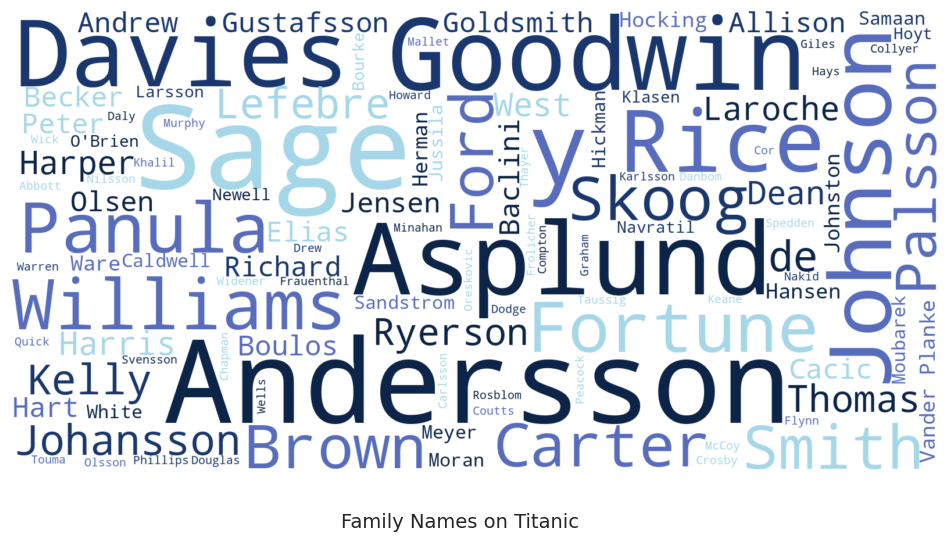

In [72]:
show_wordcloud(all_df["Family Name"], title="Family Names on Titanic")

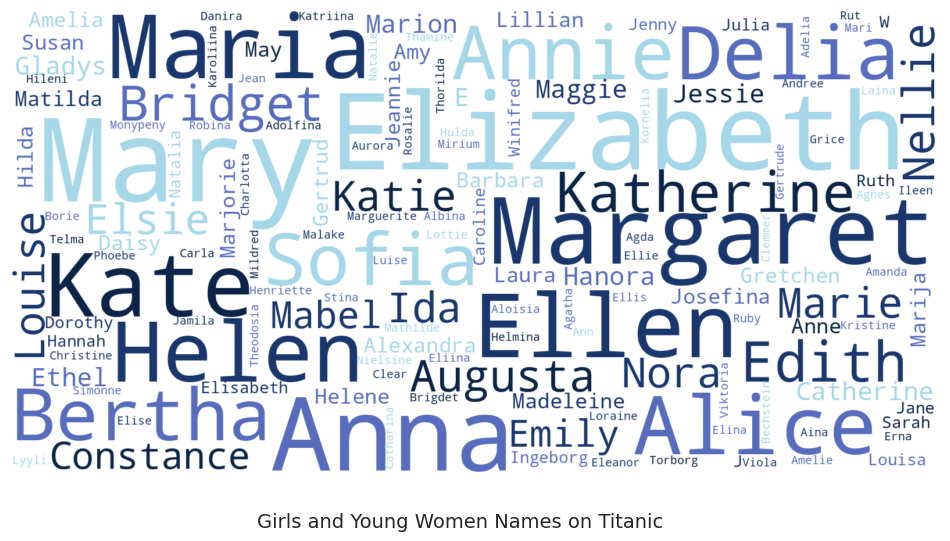

In [73]:
show_wordcloud(all_df.loc[all_df["Title"].isin(["Miss.", "Mlle."])]["Given Name"], title="Girls and Young Women Names on Titanic")

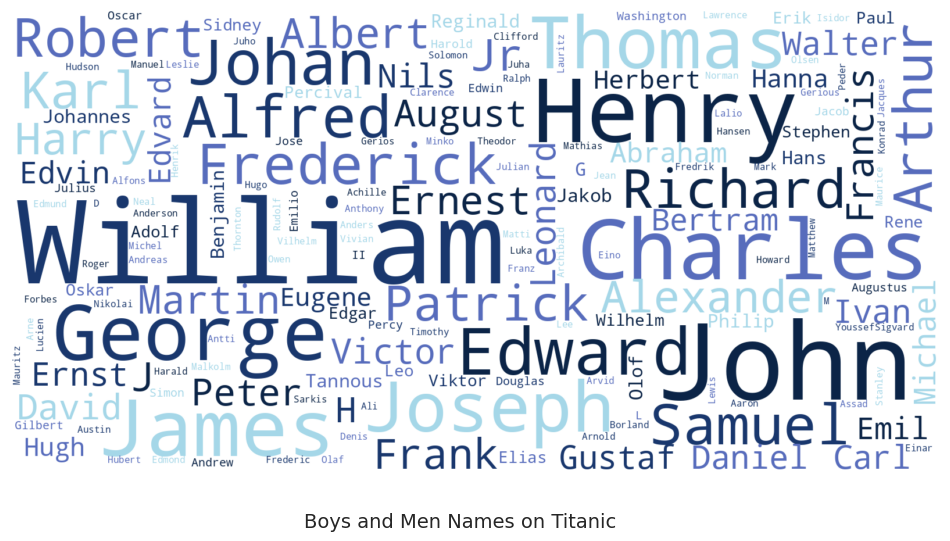

In [74]:
show_wordcloud(all_df.loc[all_df["Sex"]=="male"]["Given Name"], title="Boys and Men Names on Titanic")

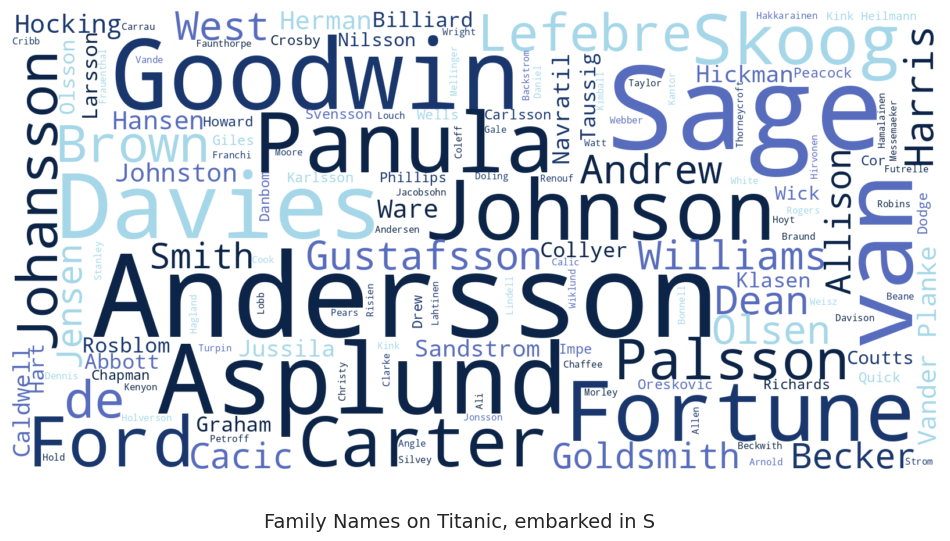

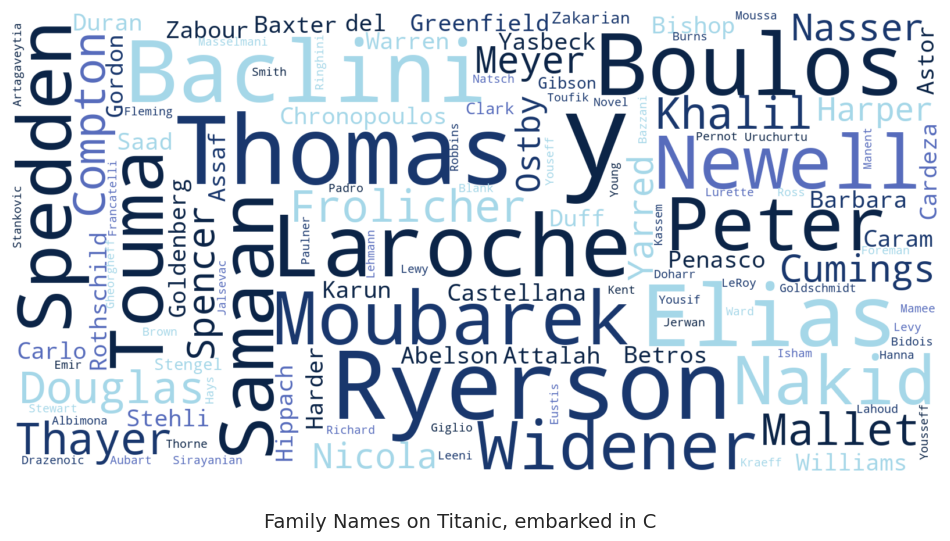

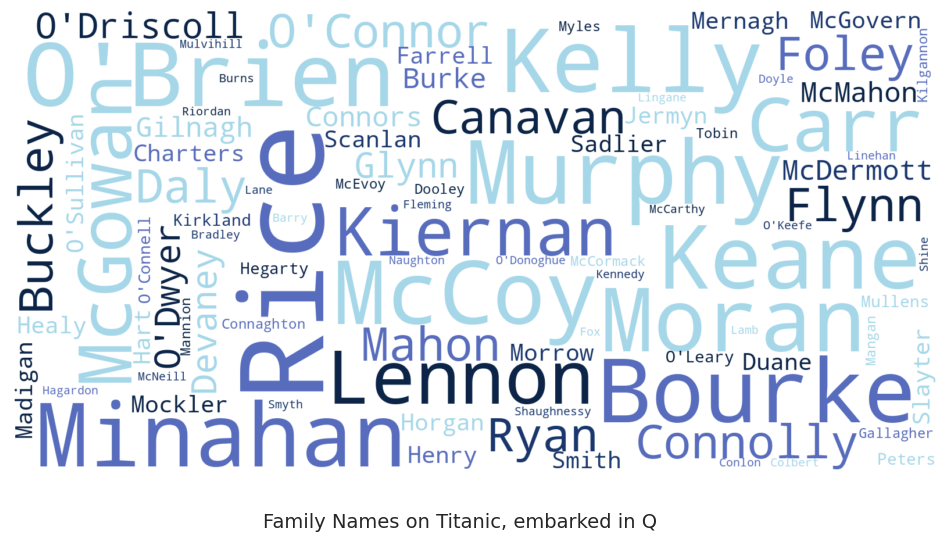

In [75]:
for embark in all_df["Embarked"].unique():
    try:
        show_wordcloud(all_df.loc[all_df["Embarked"]==embark]["Family Name"], title=f"Family Names on Titanic, embarked in {embark}")
    except:
        pass

## Dashboard

In [76]:
for dataset in [all_df, train_df]:
    dataset.loc[dataset["Family Size"] == 1, "Family Type"] = "Single"
    dataset.loc[(dataset["Family Size"] > 1) & (dataset["Family Size"] < 5), "Family Type"] = "Small"
    dataset.loc[(dataset["Family Size"] >= 5), "Family Type"] = "Large"

In [77]:
for dataset in [all_df, train_df]:
    dataset["Titles"] = dataset["Title"]

In [78]:
for dataset in [all_df, train_df]:
    #unify `Miss`
    dataset['Titles'] = dataset['Titles'].replace('Mlle.', 'Miss.')
    dataset['Titles'] = dataset['Titles'].replace('Ms.', 'Miss.')
    #unify `Mrs`
    dataset['Titles'] = dataset['Titles'].replace('Mme.', 'Mrs.')
    # unify Rare
    dataset['Titles'] = dataset['Titles'].replace(['Lady.', 'the Countess.','Capt.', 'Col.',\
     'Don.', 'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Rare')


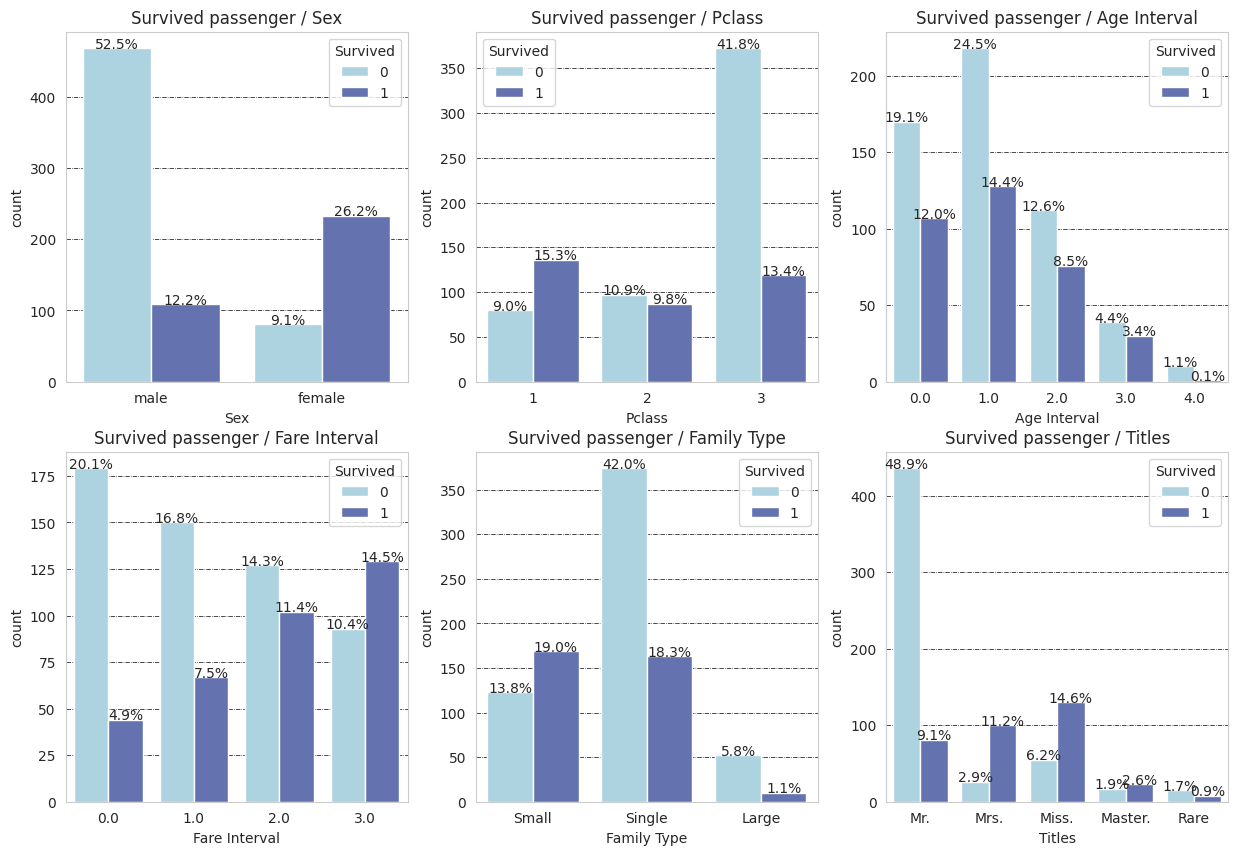

In [79]:
f, ax = plt.subplots(2, 3, figsize=(15, 10))

features = ["Sex", "Pclass", "Age Interval", "Fare Interval", "Family Type", "Titles"]

for i, feature in enumerate(features):
    crt_ax = (int(i/3), i%3)
    total = float(len(train_df))
    sns.countplot(x=feature, data=train_df, hue="Survived", palette= color_list, ax = ax[crt_ax])
    ax[crt_ax].grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
    ax[crt_ax].set_title(f"Survived passenger / {feature}")
    for p in ax[crt_ax].patches:
        height = p.get_height()
        ax[crt_ax].text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.1f}%'.format(100*height/total),
                ha="center", fontsize=10) 


plt.show()   